In [1]:
import spacy
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot as plt
nlp = spacy.load('./data/embeddings_disc/')

In [2]:
categoria = 'edad'

In [3]:
lectura = '../datos/entrenamiento_modelos_categorias/tweets_entrenamiento_' + categoria + '_balance.csv'
data = pd.read_csv(lectura)

In [4]:
data

,Unnamed: 0,Unnamed: 0.1,full_text,categoria_1-ap,categoria_2-dis,label,categoria_4-gen,categoria_5-id,categoria_6-or,categoria_7-rel
0,46196,46943,8 children died in ice custody in 2019 say the...,0,0,1,0,0,0,0
1,46197,46944,ganas llorar veo incluso trabajando fines semana,0,0,1,0,0,0,0
2,46198,46945,pregunta quimioterapia tambien problema digo l...,0,0,1,0,0,0,0
3,46199,46946,fake algun comentario,0,0,1,0,0,0,0
4,46200,46947,estudiantes,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
21643,16231,245099,jajaja pinche chairo mal cogido,0,0,0,0,1,0,0
21644,16232,600225,lasbuscamos mtz lesli 6/12/12 uruapan michoacan,0,0,0,0,0,0,0
21645,16233,409053,sigo saludos,0,0,0,0,0,0,0
21646,16234,1014811,acomode espero [],0,0,0,0,0,0,0


In [5]:
train, test = train_test_split(data, test_size=0.2,random_state = 202008)

In [6]:
npEmbeddings2 = np.empty([0, 300])
for texto in test['full_text']:
    
    #print(frase)
    
    # process a sentence using the model
    doc = nlp(texto)
    
    # print(doc.vector.shape)
    #print(npEmbeddings.shape)
    #print(doc.vector.shape)
    
    if doc.vector.shape[0]==300:
        npEmbeddings2 = np.append(npEmbeddings2, [doc.vector], axis = 0)
    else:
        npAux = np.empty([1, 300])
        doc = nlp('prueba')
        #npEmbeddings = np.append(npEmbeddings, npAux, axis = 0)
        npEmbeddings2 = np.append(npEmbeddings2, [doc.vector], axis = 0)
        predicted_svm = clf.predict([doc.vector])
        
npEmbeddings2.shape

(4330, 300)

In [7]:
import pickle as pickle

carga_modelo = '../modelos/modelo_capa2_' + categoria +'.p'
pickleFile = open(carga_modelo, 'rb')
best_model = pickle.load(pickleFile)
pickleFile.close()

In [8]:
y_probas = best_model.predict_proba(npEmbeddings2)
y_true = test['label']
y_prob = pd.DataFrame(y_probas)
y_prob.columns = ["cero","uno"]
y_prob = y_prob["uno"] 

In [9]:
y_prob = best_model.predict(npEmbeddings2)
confusion_matrix(y_true, y_prob)

array([[2890,  353],
       [ 630,  457]])

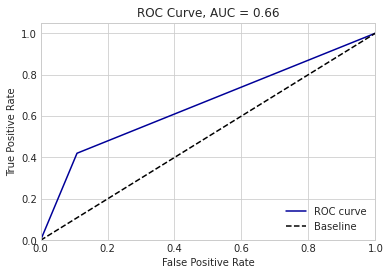

In [10]:
#Definimos la funcion que graficará la ROC
def plot_ROC(test_labels, test_predictions):
    fpr, tpr, thresholds = metrics.roc_curve(test_labels, 
                                             test_predictions, pos_label=1)
    auc = "%.2f" % metrics.auc(fpr, tpr)
    title = 'ROC Curve, AUC = '+str(auc)
    with plt.style.context(('seaborn-whitegrid')):
        fig, ax = plt.subplots()
        ax.plot(fpr, tpr, "#000099", label='ROC curve')
        ax.plot([0, 1], [0, 1], 'k--', label='Baseline')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.title(title)
    return  
plot_ROC(y_true, y_prob) 

In [11]:
metrics.f1_score(y_true, y_prob)

0.4818133895624671

In [12]:
metrics.recall_score(y_true, y_prob)

0.4204231830726771